In [23]:
import os
import csv
import codecs
import numpy

In [24]:
def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [25]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [26]:
def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index)
    deleteList1 = sorted(deleteList, reverse=True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows
            

In [27]:
#read fixations for one subject

def readFixationsForOneSubject(subject):
    path = ".\\PJ0009\\data\\fixations_"
    files= os.listdir(path) #得到文件夹下的所有文件名称
    fixations = []
    for file in files:
        if not os.path.isdir(file) and str(file).split('_')[1]==subject:
            f = codecs.open(path+"/"+file, 'r', encoding = 'utf8')
            reader = csv.reader(f)
            flag = 0
            for line in reader:
                flag = flag + 1
                if flag ==1:
                    continue
                if flag > 1:
                    fixations.append(line)
            f.close()
    return fixations

In [28]:
def drawFixRate(title, posList, keyList, rateList):
    
    from PIL import Image, ImageDraw, ImageFont
    import matplotlib.pyplot as plt

    image = Image.open('back.png')
    draw = ImageDraw.Draw(image)
    for index in range(len(keyList)):
        if not keyList[index]==' ':
            #key width=130.9px height=200px
            x1 = int(posList[index][0]-(130.9/2))
            y1 = int(posList[index][1]-(200/2))
            x2 = int(posList[index][0]+(130.9/2))
            y2 = int(posList[index][1]+(200/2))
            
            draw.rectangle((x1,y1,x2,y2), fill=(int((1-rateList[index])*255), 0, 0), outline=None)
            font1 = ImageFont.truetype("arial.ttf", 80)
            font2 = ImageFont.truetype("arial.ttf", 40)
            draw.text((x1+45,y1), keyList[index],  fill=(255, 255, 255), font=font1)
            draw.text((x1+10,y1+100), str(rateList[index]*100)[0:4]+'%',  fill=(255, 255, 255), font=font2)
            
        else:
            #key width=716px height=200px
            x1 = int(posList[index][0]-(716/2))
            y1 = int(posList[index][1]-(200/2))
            x2 = int(posList[index][0]+(716/2))
            y2 = int(posList[index][1]+(200/2))
            
            draw.rectangle((x1,y1,x2,y2), fill=(int((1-rateList[index])*255), 0, 0), outline=None)
            font1 = ImageFont.truetype("arial.ttf", 80)
            font2 = ImageFont.truetype("arial.ttf", 40)
            draw.text((x1+350,y1), keyList[index],  fill=(255, 255, 255), font=font1)
            #draw.text((x1+310,y1+100), str(rateList[index]*100)[0:4]+'%',  fill=(255, 255, 255), font=font2)
            #str1 = str(rateList[index]*100)
            #draw.text((x1+310,y1+100), str1.split('.')[0]+'.'+str1.split('.')[1][0:1]+'%',  fill=(255, 255, 255), font=font2)
            draw.text((x1+310,y1+100), str(round(rateList[index]*100,1))+'%',  fill=(255, 255, 255), font=font2)
            
    image.save(title+ ".png")
    #image.show()

In [29]:
def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
        return False

In [30]:
def x_cm2pic(x):
    xscale =1838-594 ; x0 = 94; xim = 500
    return x*xscale+x0+xim
    
def y_cm2pic(y):
    yscale =2524-1920 ; y0 = 1720; yim = 200
    return y*yscale+y0+yim

def xy_cm2pic(x,y):
    return [x_cm2pic(x),y_cm2pic(y)]

# return key position
def KeyToXY(key):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    xs = [566, 697, 828, 959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 566, 697, 828, 
          959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 740, 900, 1060, 1220, 1380, 1540, 
          1700, 1872, 1220]
    ys = [2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2248, 2248, 2248, 
          2248, 2248, 2248, 2248, 2248, 2248, 2248, 2248, 2452, 2452, 2452, 2452, 2452, 2452, 
          2452, 2455, 2656]
    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]

In [31]:
# distance between eye position and target key center is smaller than d?

def isInDis(key, x, y, d):
    x1 = x_cm2pic(x)
    y1 = y_cm2pic(y)
    x2 = KeyToXY(key)[0]
    y2 = KeyToXY(key)[1]
    # convert from pixel to cm
    dis = (0.4448336*numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)))/100
    if dis<d:
        return True
    else:
        return False

In [32]:
# eye position is in the rectangle around the target key?

def isInRec(key, x, y, dis):
    x = x_cm2pic(x)
    y = y_cm2pic(y)
    if key==' ':
        #key width=716px height=200px
        x1 = KeyToXY(key)[0]-(716/2)-dis
        y1 = KeyToXY(key)[1]-(200/2)-dis
        x2 = KeyToXY(key)[0]+(716/2)+dis
        y2 = KeyToXY(key)[1]+(200/2)+dis
    else:
        #key width=130.9px height=200px
        x1 = KeyToXY(key)[0]-(130.9/2)-dis
        y1 = KeyToXY(key)[1]-(200/2)-dis
        x2 = KeyToXY(key)[0]+(130.9/2)+dis
        y2 = KeyToXY(key)[1]+(200/2)+dis
        
    if x1<x<x2 and y1<y<y2:
        return True
    else:
        return False
        

In [33]:
def calculateForEachSubject(ts, te, d):
    
    import matplotlib.pyplot as plt
    import operator as op

    alltlogs = deleteTheRows(addEventKey(readAlltlogs()))

    flag = 0
    fixationForOneSubject = []
    allSubjects = []
    keyList = []
    rateList = []
    std_dev = []
    posList = []

    #read all subject numbers
    for line in alltlogs:
        if line[0] not in allSubjects:
            allSubjects.append(line[0])

    for item in allSubjects:
        #calculate for each subject
        fixationForOneSubject = readFixationsForOneSubject(str(item))
        fixationList = []
        for line in alltlogs:
            
            if line[0]==item and not len(KeyToXY(line[7]))==0:
                #find all tlogs for current subject
                #eventKey is in key list
                if line[3]=='-120':
                    #trialtimeBefore = float(line[3])
                    #lastKey = line[7]
                    continue
                else:
                    flag = flag + 1
                    trialtime = float(line[3])
                    eventKey = line[7]
                    fixNumber = 0
                    currentFix = -1
                    for line1 in fixationForOneSubject:
                        #current sentence, between 2 taps, how many fixations
                        #print(line1[3])
                        #######problems:
                        #1. in some fixation files, trial time was written as system time(much bigger than normal)
                        #2. in some fixation files, trial time was written as a string with characters
                        if not line1[4] == currentFix:
                            #take the first line in all same fixation lines
                            if line1[1]== line[5]:
                                #same block
                                if isNumber(line1[3]):
                                    # don't count lines with character trial time
                                    if line1[2].split('.')[0] == line[6].split('.')[0] and trialtime-ts<float(line1[3])<trialtime-te:
                                        # same sentence, time between trialtime-ts and trialtime-te (ts>te)                                        
                                        #dis = 
                                        #distance from target key
                                        #if isInRec(eventKey, float(line1[5]), float(line1[6]), (d*100)/0.4448336):
                                        if isInDis(eventKey, float(line1[5]), float(line1[6]), d):
                                            fixNumber = 1
                                            currentFix = line1[4]

                    if len(fixationList)==0:
                        temp = []
                        temp.append(eventKey)
                        temp.append(fixNumber)
                        temp.append(1)
                        fixationList.append(temp)
                    else:
                        flag = 0
                        for line2 in fixationList:
                            if line2[0]==eventKey:
                                line2[1] = line2[1]+fixNumber
                                line2[2] = line2[2]+1
                                flag = 1
                        if flag==0:
                            temp = []
                            temp.append(eventKey)
                            temp.append(fixNumber)
                            temp.append(1)
                            fixationList.append(temp)
                    #print(fixationList)
                    #trialtimeBefore = trialtime
                    #lastKey = eventKey

        for dataLine in fixationList:
            dataLine[1] = dataLine[1]/dataLine[2]
        fixationList1 = sorted(fixationList, key = op.itemgetter(1))
        #print(fixationList1)
        for dataLine in fixationList1:
            #print(dataLine) 
            keyList.append(dataLine[0])
            rateList.append(dataLine[1])
            std_dev.append(0)
            posList.append(KeyToXY(dataLine[0]))
            
        
        

        title = item+'_fixationRate_ts='+str(ts)+'_te='+str(te)+'_d='+str(d)
        
        #drawGraph(numberList, std_dev, keyList, title)
        drawFixRate(title, posList, keyList, rateList)
        
        keyList = []
        rateList = []
        std_dev = []
        posList = []
    

In [34]:
def calculateForAll(ts, te, d):
    
    #ts, te are in ms
    
    import matplotlib.pyplot as plt
    import operator as op

    alltlogs = deleteTheRows(addEventKey(readAlltlogs()))

    flag = 0
    fixationForOneSubject = []
    allSubjects = []
    keyList = []
    rateList = []
    std_dev = []
    posList = []
    fixationList = []

    #read all subject numbers
    for line in alltlogs:
        if line[0] not in allSubjects:
            allSubjects.append(line[0])

    for item in allSubjects:
        #calculate for each subject
        fixationForOneSubject = readFixationsForOneSubject(str(item))
        
        for line in alltlogs:
            
            if line[0]==item and not len(KeyToXY(line[7]))==0:
                #find all tlogs for current subject
                #eventKey is in key list
                if line[3]=='-120':
                    #trialtimeBefore = float(line[3])
                    #lastKey = line[7]
                    continue
                else:
                    flag = flag + 1
                    trialtime = float(line[3])
                    eventKey = line[7]
                    fixNumber = 0
                    currentFix = -1
                    for line1 in fixationForOneSubject:
                        #current sentence, between 2 taps, how many fixations
                        #print(line1[3])
                        #######problems:
                        #1. in some fixation files, trial time was written as system time(much bigger than normal)
                        #2. in some fixation files, trial time was written as a string with characters
                        if not line1[4] == currentFix:
                            #take the first line in all same fixation lines
                            if line1[1]== line[5]:
                                #same block
                                if isNumber(line1[3]):
                                    # don't count lines with character trial time
                                    if line1[2].split('.')[0] == line[6].split('.')[0] and trialtime-ts<float(line1[3])<trialtime-te:
                                        #same sentence, time between trialtime-ts and trialtime-te (ts>te)                                        
                                        #dis = distanceKeyFixation(eventKey, float(line1[5]), float(line1[6]))
                                        #distance from target key
                                        if isInRec(eventKey, float(line1[5]), float(line1[6]), (d*100)/0.4448336):
                                            fixNumber = 1
                                            currentFix = line1[4]

                    if len(fixationList)==0:
                        temp = []
                        temp.append(eventKey)
                        temp.append(fixNumber)
                        temp.append(1)
                        fixationList.append(temp)
                    else:
                        flag = 0
                        for line2 in fixationList:
                            if line2[0]==eventKey:
                                line2[1] = line2[1]+fixNumber
                                line2[2] = line2[2]+1
                                flag = 1
                        if flag==0:
                            temp = []
                            temp.append(eventKey)
                            temp.append(fixNumber)
                            temp.append(1)
                            fixationList.append(temp)
                    #print(fixationList)
                    #trialtimeBefore = trialtime
                    #lastKey = eventKey

    for dataLine in fixationList:
         dataLine[1] = dataLine[1]/dataLine[2]
    fixationList1 = sorted(fixationList, key = op.itemgetter(1))
    #print(fixationList1)
    for dataLine in fixationList1:
        #print(dataLine) 
        keyList.append(dataLine[0])
        rateList.append(dataLine[1])
        std_dev.append(0)
        posList.append(KeyToXY(dataLine[0]))
            
    title = 'fixationRate_for_all'
    #drawFixRate(title, posList, keyList, rateList)
    return outputFactors(posList, keyList, rateList)
    
    

In [35]:
#calculate average rate of every keys except for space and backspace

def outputFactors(posList, keyList, rateList):
    keyList1 = []
    rateList1 = []
    allRate = 0
    for index in range(len(keyList)):
        if keyList[index]==' ' or keyList[index]=='B':
            continue
        else:
            keyList1.append(keyList[index])
            rateList1.append(rateList[index])
    for index1 in range(len(rateList1)):
        allRate = allRate + rateList1[index1]
    #calculate average rate of every keys except for space and backspace
    avgRate = allRate/len(rateList1)
    return avgRate
    

In [51]:
def drawLineChart(title, xList, yList, flag):
    import matplotlib.pyplot as plt 
  
    plt.figure(figsize=(8,4))
    
    if flag=='t':
        plt.xlabel('Time(s)')
    if flag=='d':
        plt.xlabel('Distance(cm)')

    plt.xlabel('Time(s)')  
    plt.ylabel('LocationRate(%)') 
    plt.title(title)
    
    if len(xList)!=0:
        plt.plot(xList,yList,".-",linewidth=1)
    
    plt.savefig(title+".png")
    plt.show()

In [92]:
def writeCSV(title, xList, yList, flag):
    import csv
    with open(title+'.csv','a+',encoding='utf8',newline = '')  as f:
        f_csv = csv.writer(f)
        if flag=='t':
            f_csv.writerow(['Twindow','LocationRate'])
        if flag=='d':
            f_csv.writerow(['Dwindow','LocationRate'])
        for index in range(len(xList)):
            f_csv.writerow([xList[index],yList[index]])
  

In [93]:
def calculateForT(Twindow, Tstep, d):
    # Twindow, Tstep are in s
    title = 'LocationRate_Twindow='+str(Twindow)+'_Tstep='+str(Tstep)+'_d='+str(d)
    n = int(Twindow/Tstep)
    t = 0
    timeList = []
    rateList = []
    for index in range(n):
        print(index)
        if not index==0:
            #turn s to ms, and put into calculateForAll(t, 0, d)
            t = t + (Tstep*1000)
            r = calculateForAll(t, 0, d)
            #turn ms back to s and show
            timeList.append(t/1000)
            #turn 0.x to x%
            rateList.append(r*100)
        else:
            timeList.append(0)
            rateList.append(0)
            
    writeCSV(title, timeList, rateList,'t')
    drawLineChart(title, timeList, rateList)
        
    

0
1
2
3
4
5
6
7
8
9


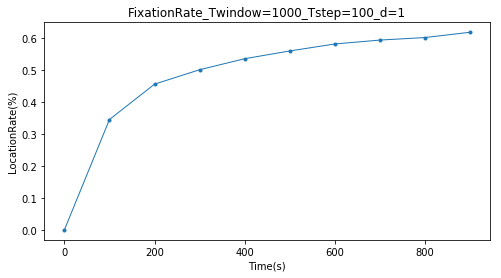

In [50]:
calculateForT(1000, 100, 1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


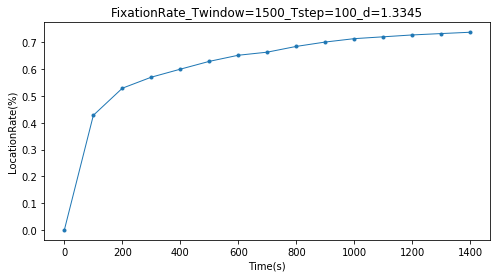

In [90]:
calculateForT(1500, 100, 1.3345)

In [ ]:
#First round for T, calculateForT(1500, 100, 1.3345) Rmax=0.73, 0.9Rmax=0.657 (t=600)

In [94]:
def calculateForD(Dwindow, Dstep, t):
    title = 'FixationRate_Dwindow='+str(Dwindow)+'_Dstep='+str(Dstep)+'_t='+str(t)
    n = int(Dwindow/Dstep)
    d = 0
    disList = []
    rateList = []
    for index in range(n):
        print(index)
        if not index==0:
            d = d + Dstep
            #turn t from s to ms and put into calculateForAll(t, 0, d)
            r = calculateForAll(t*1000, 0, d)
            disList.append(d)
            #turn 0.x to x%
            rateList.append(r*100)
        else:
            disList.append(0)
            rateList.append(0)
            
    writeCSV(title, disList, rateList, 'd')
    drawLineChart(title, disList, rateList)
        
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


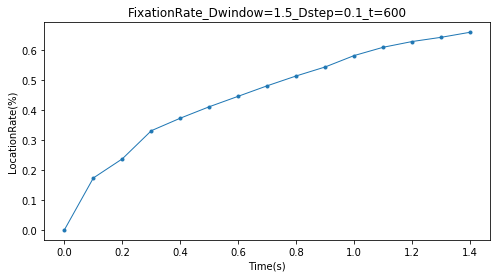

In [95]:
calculateForD(1.5, 0.1, 600)

0
1
2
3
4
5
6
7
8
9


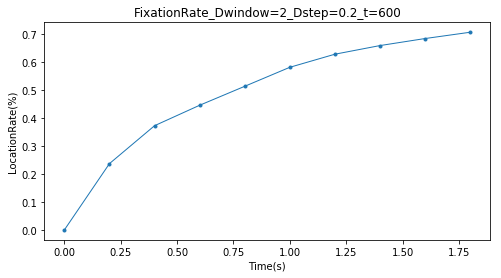

In [96]:
calculateForD(2, 0.2, 600)

0
1
2
3
4
5
6
7
8
9


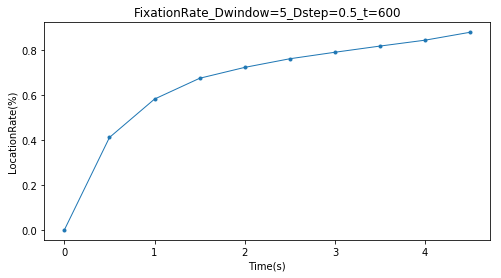

In [97]:
calculateForD(5, 0.5, 600)

In [ ]:
#First round for D, calculateForD(2, 0.2, 600) Rmax=0.7, 0.9Rmax=0.63 (d=1.2),

0
1
2
3
4
5


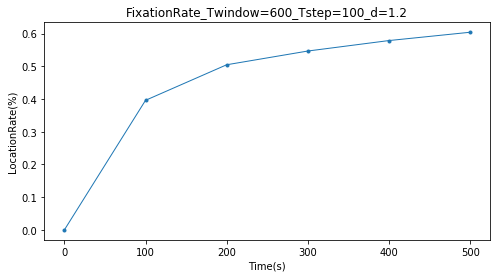

In [98]:
calculateForT(600, 100, 1.2)

0
1
2
3
4
5
6
7
8
9
10
11


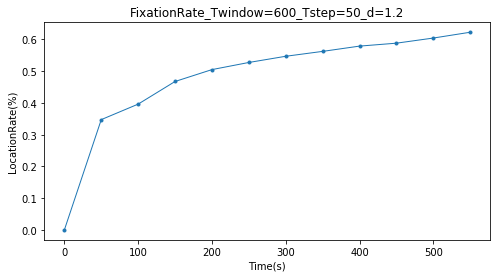

In [99]:
calculateForT(600, 50, 1.2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


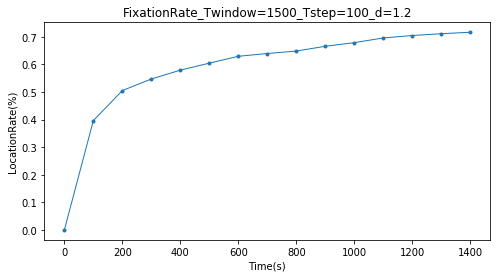

In [100]:
calculateForT(1500, 100, 1.2)

In [ ]:
#Second round for T, calculateForT(1500, 100, 1.2) Rmax=0.71, 0.9Rmax=0.639 (t=700)

0
1
2
3
4
5
6
7
8
9


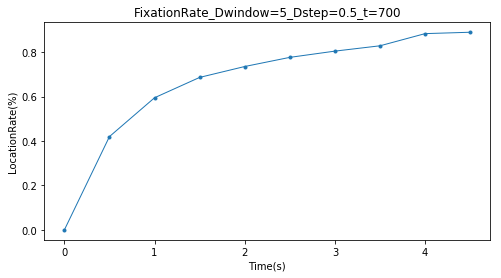

In [101]:
calculateForD(5, 0.5, 700)